In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.ticker import ScalarFormatter
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import xgboost as xgb
from scipy.stats import pearsonr, bartlett, levene, wilcoxon, mannwhitneyu, ttest_ind, f_oneway, kruskal
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera
import pingouin as pg
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

In [2]:
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv('C:/Users/Home/Desktop/Data/2차/df2.csv', encoding = 'utf-8')

In [4]:
df2 = df.copy()

In [5]:
df2['고객구분_New'] = '임시'
df2.loc[df2['RFM_Class'].isin(['VIP고객', '충성고객', '잠재VIP고객']), '고객구분_New'] = '연속'
df2.loc[df2['RFM_Class'].isin(['잠재충성고객', '놓치면안될고객']), '고객구분_New'] = '간헐'
df2.loc[df2['RFM_Class'].isin(['관심필요고객', '이탈우려고객', '겨울잠고객']), '고객구분_New'] = '휴면'

In [6]:
df2['고객구분_New'].value_counts()

휴면    119357
연속    111254
간헐     69389
Name: 고객구분_New, dtype: int64

## 랜덤포레스트

In [7]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df2.select_dtypes(include=['number'])
y = df2['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
RF_model = RandomForestClassifier()

# 모델 학습
RF_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999333333333333
Confusion Matrix:
 [[13874     1     0]
 [    0 22395     0]
 [    3     0 23727]]
Classification Report:
               precision    recall  f1-score   support

          간헐       1.00      1.00      1.00     13875
          연속       1.00      1.00      1.00     22395
          휴면       1.00      1.00      1.00     23730

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



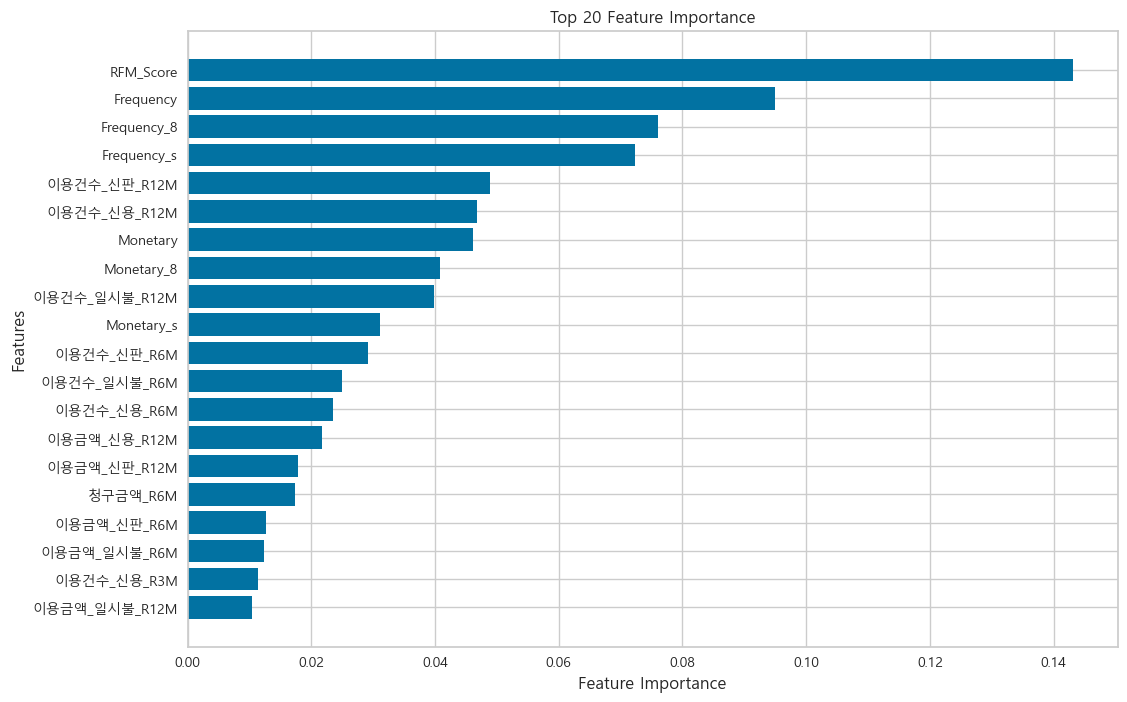

In [17]:
# feature importance 추출
importance = RF_model.feature_importances_

# 각 특성의 이름 (예제에서는 'Feature 1', 'Feature 2', 등)
feature_names = X.columns

# feature importance를 내림차순으로 정렬한 후, 상위 20개만 선택
top_20_indices = importance.argsort()[::-1][:20]
top_20_importance = importance[top_20_indices]
top_20_feature_names = feature_names[top_20_indices]

# 시각화
plt.figure(figsize=(12, 8))
plt.barh(top_20_feature_names, top_20_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()  # 특성 이름을 역순으로 표시
plt.show()

In [23]:
df3 = df2[df2['고객구분_New'] != '간헐']

In [25]:
# 데이터 준비 (X는 특성 데이터, y는 타겟 변수)
X = df3[['이용건수_신판_R12M', '이용금액_신판_R12M', '청구금액_R6M']]
y = df3['고객구분_New']  # Target 컬럼에 이탈 여부 정보가 있는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
RF_model = RandomForestClassifier()

# 모델 학습
RF_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = RF_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9753051622834594
Confusion Matrix:
 [[21369  1057]
 [   82 23615]]
Classification Report:
               precision    recall  f1-score   support

          연속       1.00      0.95      0.97     22426
          휴면       0.96      1.00      0.98     23697

    accuracy                           0.98     46123
   macro avg       0.98      0.97      0.98     46123
weighted avg       0.98      0.98      0.98     46123



In [32]:
df4 = df2[df2['고객구분_New'] == '간헐']

In [33]:
df4 = df4[['이용건수_신판_R12M', '이용금액_신판_R12M', '청구금액_R6M','고객구분_New']]

In [34]:
X1 = df4[['이용건수_신판_R12M', '이용금액_신판_R12M', '청구금액_R6M']]

In [35]:
df4['prediction'] = RF_model.predict(X1)

In [36]:
df4['prediction'].value_counts()

연속    54947
휴면    14442
Name: prediction, dtype: int64

In [39]:
result_df = df2[df2['고객구분_New'] == '간헐'].merge(df4[['prediction']], left_index=True, right_index=True)

In [45]:
result_df.to_csv('result_df.csv', encoding='utf-8', index=False)

In [44]:
result_df.head()

,Unnamed: 0,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,...,Frequency_s,Monetary_s,labels_k,Recency_8,Frequency_8,Monetary_8,RFM_Score,RFM_Class,고객구분_New,prediction
6,6,w8NeFjRo,2,38,1,20170609,19,1,0,0,...,0.025141,0.001804,1,8,5,4,61.056236,잠재충성고객,간헐,연속
9,9,OdlqFy2F,2,42,1,20100816,101,0,0,0,...,0.017980,0.003194,1,8,4,7,64.671510,잠재충성고객,간헐,연속
11,11,PjmGznTm,1,45,1,19950524,284,0,0,1,...,0.026665,0.001722,1,8,5,4,61.056236,잠재충성고객,간헐,연속
16,16,Os3UUS88,1,80,1,20171128,14,0,0,0,...,0.032759,0.001639,1,8,5,4,61.056236,잠재충성고객,간헐,연속
25,25,CRX23tPQ,1,34,1,20170921,16,1,0,0,...,0.025598,0.001177,1,8,5,3,57.226267,놓치면안될고객,간헐,연속
